In [7]:
!pip install texthero

     |████████████████████████████████| 1.5MB 33.5MB/s 
     |████████████████████████████████| 245kB 35.2MB/s 
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Python_google_colab/bbcsport.csv')

In [4]:
df.head()

,text,topic
0,Claxton hunting first major medal\n\nBritish h...,athletics
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics
2,Greene sets sights on world title\n\nMaurice G...,athletics
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics


In [5]:
df['topic'].value_counts()

football     265
rugby        147
cricket      124
athletics    101
tennis       100
Name: topic, dtype: int64

In [6]:
df.shape

(737, 2)

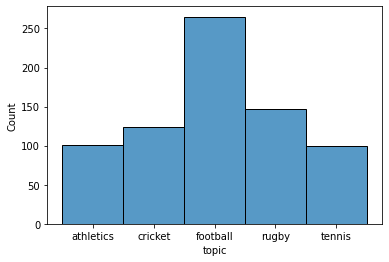

In [10]:
import seaborn as sns
sns.histplot(df['topic'])

In [11]:
import texthero as hero
df['clean_data'] = hero.clean(df['text'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
df.head()

,text,topic,clean_data
0,Claxton hunting first major medal\n\nBritish h...,athletics,claxton hunting first major medal british hurd...
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,sullivan could run worlds sonia sullivan indic...
2,Greene sets sights on world title\n\nMaurice G...,athletics,greene sets sights world title maurice greene ...
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,iaaf launches fight drugs iaaf athletics world...
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,dibaba breaks 000m world record ethiopia tirun...


In [13]:
df['clean_data'][0]

'claxton hunting first major medal british hurdler sarah claxton confident win first major medal next month european indoor championships madrid year old already smashed british record 60m hurdles twice season setting new mark seconds win aaas title quite confident said claxton take race comes long keep training much think chance medal claxton national 60m hurdles title past three years struggled translate domestic success international stage scotland born athlete owns equal fifth fastest time world year last week birmingham grand prix claxton left european medal favourite russian irina shevchenko trailing sixth spot first time claxton preparing campaign hurdles could explain leap form previous seasons year old also contested long jump since moving colchester london focused attentions claxton see new training regime pays dividends european indoors take place march'

In [14]:
df['text'][0]

'Claxton hunting first major medal\n\nBritish hurdler Sarah Claxton is confident she can win her first major medal at next month\'s European Indoor Championships in Madrid.\n\nThe 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. "I am quite confident," said Claxton. "But I take each race as it comes. "As long as I keep up my training but not do too much I think there is a chance of a medal." Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week\'s Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.\n\nFor the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In previous

In [16]:
df['pca'] = hero.pca(hero.tfidf(df['clean_data']))

In [17]:
df.head()

,text,topic,clean_data,pca
0,Claxton hunting first major medal\n\nBritish h...,athletics,claxton hunting first major medal british hurd...,"[-0.09098341139255824, 0.10349818483091999]"
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,sullivan could run worlds sonia sullivan indic...,"[-0.00040331415693195137, 0.024597213258187912]"
2,Greene sets sights on world title\n\nMaurice G...,athletics,greene sets sights world title maurice greene ...,"[-0.11765357712279555, 0.12871763983780504]"
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,iaaf launches fight drugs iaaf athletics world...,"[-0.09137806647329501, 0.1540147100579918]"
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,dibaba breaks 000m world record ethiopia tirun...,"[-0.09122883447935112, 0.13490398713504895]"


In [22]:
hero.scatterplot(df,'pca',color = 'topic')   ################## 5 categories in topic column

In [24]:
df['kmeans_labels'] = (
    hero.tfidf(df['clean_data'])
    .pipe(hero.kmeans, n_clusters=5)
    .astype(str)
)

In [25]:
df.head()

,text,topic,clean_data,pca,kmeans_labels
0,Claxton hunting first major medal\n\nBritish h...,athletics,claxton hunting first major medal british hurd...,"[-0.09098341139255824, 0.10349818483091999]",2
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,sullivan could run worlds sonia sullivan indic...,"[-0.00040331415693195137, 0.024597213258187912]",1
2,Greene sets sights on world title\n\nMaurice G...,athletics,greene sets sights world title maurice greene ...,"[-0.11765357712279555, 0.12871763983780504]",2
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,iaaf launches fight drugs iaaf athletics world...,"[-0.09137806647329501, 0.1540147100579918]",2
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,dibaba breaks 000m world record ethiopia tirun...,"[-0.09122883447935112, 0.13490398713504895]",2


In [27]:
hero.scatterplot(df,'pca',color = 'kmeans_labels') 

In [31]:
df['topic'].value_counts()

football     265
rugby        147
cricket      124
athletics    101
tennis       100
Name: topic, dtype: int64

In [29]:
df['kmeans_labels'].value_counts()

1    245
4    185
3    116
2     96
0     95
Name: kmeans_labels, dtype: int64

In [32]:
df['tokenize'] = hero.tokenize(df['clean_data'])

In [33]:
df.head()

,text,topic,clean_data,pca,kmeans_labels,tokenize
0,Claxton hunting first major medal\n\nBritish h...,athletics,claxton hunting first major medal british hurd...,"[-0.09098341139255824, 0.10349818483091999]",2,"[claxton, hunting, first, major, medal, britis..."
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,sullivan could run worlds sonia sullivan indic...,"[-0.00040331415693195137, 0.024597213258187912]",1,"[sullivan, could, run, worlds, sonia, sullivan..."
2,Greene sets sights on world title\n\nMaurice G...,athletics,greene sets sights world title maurice greene ...,"[-0.11765357712279555, 0.12871763983780504]",2,"[greene, sets, sights, world, title, maurice, ..."
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,iaaf launches fight drugs iaaf athletics world...,"[-0.09137806647329501, 0.1540147100579918]",2,"[iaaf, launches, fight, drugs, iaaf, athletics..."
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,dibaba breaks 000m world record ethiopia tirun...,"[-0.09122883447935112, 0.13490398713504895]",2,"[dibaba, breaks, 000m, world, record, ethiopia..."


In [35]:
hero.top_words(df['clean_data'])

said               1338
first               790
england             749
game                681
one                 671
                   ... 
canny                 1
recapturing           1
kung                  1
physiotherapist       1
titanium              1
Name: clean_data, Length: 12796, dtype: int64

In [40]:
df['dbscan_labels'] = (
    hero.tfidf(df['clean_data'])
    .pipe(hero.dbscan)
    .astype(str)
)

In [41]:
df.head()

,text,topic,clean_data,pca,kmeans_labels,tokenize,dbscan_labels
0,Claxton hunting first major medal\n\nBritish h...,athletics,claxton hunting first major medal british hurd...,"[-0.09098341139255824, 0.10349818483091999]",2,"[claxton, hunting, first, major, medal, britis...",-1
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,sullivan could run worlds sonia sullivan indic...,"[-0.00040331415693195137, 0.024597213258187912]",1,"[sullivan, could, run, worlds, sonia, sullivan...",-1
2,Greene sets sights on world title\n\nMaurice G...,athletics,greene sets sights world title maurice greene ...,"[-0.11765357712279555, 0.12871763983780504]",2,"[greene, sets, sights, world, title, maurice, ...",-1
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,iaaf launches fight drugs iaaf athletics world...,"[-0.09137806647329501, 0.1540147100579918]",2,"[iaaf, launches, fight, drugs, iaaf, athletics...",-1
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,dibaba breaks 000m world record ethiopia tirun...,"[-0.09122883447935112, 0.13490398713504895]",2,"[dibaba, breaks, 000m, world, record, ethiopia...",-1


In [42]:
df['dbscan_labels'].value_counts()

-1    737
Name: dbscan_labels, dtype: int64

In [43]:
df['tsne'] = hero.tsne(hero.tfidf(df['clean_data']))

In [44]:
df.head()

,text,topic,clean_data,pca,kmeans_labels,tokenize,dbscan_labels,tsne
0,Claxton hunting first major medal\n\nBritish h...,athletics,claxton hunting first major medal british hurd...,"[-0.09098341139255824, 0.10349818483091999]",2,"[claxton, hunting, first, major, medal, britis...",-1,"[1.0782663822174072, -32.1010627746582]"
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,sullivan could run worlds sonia sullivan indic...,"[-0.00040331415693195137, 0.024597213258187912]",1,"[sullivan, could, run, worlds, sonia, sullivan...",-1,"[2.246330976486206, -21.730745315551758]"
2,Greene sets sights on world title\n\nMaurice G...,athletics,greene sets sights world title maurice greene ...,"[-0.11765357712279555, 0.12871763983780504]",2,"[greene, sets, sights, world, title, maurice, ...",-1,"[0.39670515060424805, -40.77918243408203]"
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,iaaf launches fight drugs iaaf athletics world...,"[-0.09137806647329501, 0.1540147100579918]",2,"[iaaf, launches, fight, drugs, iaaf, athletics...",-1,"[25.29105567932129, 30.035545349121094]"
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,dibaba breaks 000m world record ethiopia tirun...,"[-0.09122883447935112, 0.13490398713504895]",2,"[dibaba, breaks, 000m, world, record, ethiopia...",-1,"[2.4762985706329346, -37.64107131958008]"


In [45]:
hero.scatterplot(df,'tsne',color= 'topic')